Authors:
- Gabriele Bani, 11640758
- Andrii Skliar, 11636785

In [1]:
# Note: resetting environment to free up space, that has been previously allocated 
# (more thourough explanation later in the lab)

%reset -f
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter

# our data is stored in a following fashion: 1. ted/
#                                            2. wsj/
data_dir = './'

# Lab 1: Text Corpora and Language Modelling

This lab is meant to help you get familiar with some language data, and use this data to estimate N-gram language models

First you will use the **Penn Treebank**, which is a collection of newspaper articles from the newspaper 
The Wall Street Journal. The idea is to examine the data and notice interesting properties. This will not take more than a few lines of code.

Then you will use a corpus consisting of **TedX** talks. This you will use to estimate an **N-gram language model** for different orders of N, and use this this for some tasks.

The datasets are on blackboard under course materials. Download the zip and make sure to put the files in the same directory as the notebook.

### Rules
* The lab exercises should be made in **groups of two people**.

* The deadline is **Tuesday 7 nov 16:59**.

* The assignment should submitted to **Blackboard** as `.ipynb`. Only **one submission per group**.

* The **filename** should be `lab1_lastname1_lastname2.ipynb`, so for example `lab1_Jurafsky_Martin.ipynb`.

* The notebook is graded on a scale of **0-10**. The number of points for each question is indicated in parantheses. 

* The questions marked **optional** are not graded; they are an additional challenge for those interested in going the extra mile. 

Notes on implementation:

* You should **write your code and answers in this iPython Notebook** (see http://ipython.org/notebook.html for reference material). If you have problems, please contact your teaching assistant.

* Use only **one cell for code** and **one cell for markdown** answers!    

    * Put all code in the cell with the `# YOUR CODE HERE` comment.
    
    * For theoretical question, put your solution in the YOUR ANSWER HERE cell.
    
* Test your code and **make sure we can run your notebook**

# 1. Penn treebank

## Exercise 1.1 (40 points, 5 points per subquestion )

You are provided with a corpus containing words with their Part-of-Speech tags (POS-tags for short). The format is
**word|POS** (one sentence per line) and the file name is **sec02-22.gold.tagged**. This data is extracted from Sections 02-22 from the Penn Treebank: these sections are most commonly used for training statistical models like POS-taggers and parsers.

**[Hint]** **Figure 10.1** in chapter 10 of Jurafsky and Martin (see [here](https://web.stanford.edu/~jurafsky/slp3/10.pdf_train)) holds a summary of the 45 POS-tags used in the Penn Treebank tagset together with their meaning and some examples. (If you are keen on learning more about the word-classes represented POS-tags and their definitions you can do a litle reading ahead for next week and already have a look at section 10.1 of the same chapter).

**[Hint]** the Python library [collections](https://docs.python.org/2/library/collections.html) has an object called `Counter` which will come in handy for this exercise.

**(a)** How large is the corpus? (i.e. how **many tokens**). And what is the size of the **vocabulary** used in this corpus? 

Estimate the vocabulary size both by **lowercasing** all the words as well as by leaving the words in their **original orthography**. What is an advantage of lowercasing all the words in your corpus? What is a notable downside? **Give examples.**

In [2]:
train_file = os.path.join(data_dir, 'wsj/sec02-21.gold.tagged')
word_counter_train = Counter()
word_lower_counter = Counter()
pos_counter = Counter()
with open(train_file, 'r') as content_file:
    content = content_file.read()
# list of words and their POS tags
tokens = content.split()

# go through each token and build up dictionaries of words and POS tags
for token in tokens:
    tok_split=token.split('|')
    word = tok_split[0]
    pos = tok_split[1]
    word_lower = word.lower()
    word_counter_train[word] += 1
    pos_counter[pos] += 1
    word_lower_counter[word_lower] += 1


In [3]:
corpus_size = len(tokens)
vocab_size = len(word_counter_train)
vocab_size_lower = len(word_lower_counter)

print('Corpus size: {0}\nVocabulary size: {1}\nLowercased vocabulary size: {2}'\
      .format(corpus_size, vocab_size, vocab_size_lower))

Corpus size: 929552
Vocabulary size: 44210
Lowercased vocabulary size: 39384


ANSWER:

Original orthography can provide us with valuable insights about the semantics of the word and can be very important for further predictions. This is due to the fact, that, for example, words, that start with capital letter, will most porbably have different meaning that the words, which are written in the same way, but start with lowercase letter.
Consider toy example: "muse" - source of an artists inspiration and "Muse" - name of a girl.  
Also, if we lowercase all the words, we won't be able to distinguish between words, that sentences may start with and just general words, i.e. "It was snowing outside" - "It" is the start of the sentence and "He saw, that it was snowing outside" - "it" is just a general word.

------
For the rest of this exercise you should use the **original orthography** of the data when answering the questions.

------


**(b)** Plot a graph of word frequency versus rank of a word, in this corpus. Does this corpus obey **Zipf’s law**?

Yes, it does obey Zipf's law!


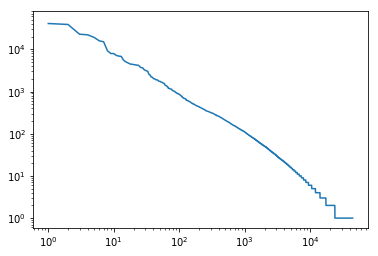

In [4]:
# get log frequency of each word in the vocabulary
freq = [(tup[1]) for tup in word_counter_train.most_common()]
# plotloglog prints data with logarithm function applied to both axis
plt.loglog(freq)
print("Yes, it does obey Zipf's law!")

**(c)** What are the **20 most common words** in the corpus and how often do they occur? What is the 50th most common word, the 100th and the 1000th and how often do they occur?

In [5]:
most_common_words = [tup for tup in word_counter_train.most_common(1000)]
most_common_20 = most_common_words[:20]
print("Most common 20 words:\n{0}\n".format(most_common_20))

most_common_50 = most_common_words[49]
most_common_100 = most_common_words[99]
most_common_1000 = most_common_words[999]
print("Most common 50th word: {0}".format(most_common_50))
print("Most common 100th word: {0}".format(most_common_100))
print("Most common 1000th word: {0}".format(most_common_1000))

Most common 20 words:
[(',', 48310), ('the', 40839), ('.', 38798), ('of', 22782), ('to', 22056), ('a', 19171), ('and', 15906), ('in', 15085), ("'s", 9249), ('that', 7951), ('for', 7912), ('$', 7125), ('is', 6893), ('The', 6791), ('said', 5597), ('on', 5112), ('%', 4871), ('it', 4639), ('by', 4450), ('from', 4437)]

Most common 50th word: ('had', 1755)
Most common 100th word: ('A', 860)
Most common 1000th word: ('man', 109)


**(d)** How many different Part-of-speech tags are present in the corpus?

In [6]:
vocab_size_pos = len(pos_counter)
print("Number of POS tags in the corpus: {0}".format(vocab_size_pos))

Number of POS tags in the corpus: 48


**(e)** Print a list of the **10 most commonly occurring POS tags** in the data. For each of these POS tags, what are the **3 most common words** that belong to that class?

In [7]:
most_common_pos = [tup[0] for tup in pos_counter.most_common()]
most_common_10 = most_common_pos[:10]
print("Most common 10 POS tags:\n{0}\n".format(most_common_10))

# build dictionary of POS tags and number of words having each POS tag
pos_word_dict = {}

# build dictionary of words along with POS tags belonging to each word
word_pos_dict = {}

for token in tokens:
    tok_split=token.split('|')
    word = tok_split[0]
    pos = tok_split[1]
    if pos not in pos_word_dict:
        pos_word_dict[pos] = Counter()
        pos_word_dict[pos][word] += 1
    else:
        pos_word_dict[pos][word] += 1  
        
    if word not in word_pos_dict:
        word_pos_dict[word] = Counter([pos])
    else:
        word_pos_dict[word][pos] += 1
        
for pos in most_common_10:
    # find most common words for specific tag along with their 
    # occurrences in the text with that tag specifically
    top_three = [tup for tup in pos_word_dict[pos].most_common(3)]
    print("3 most common words among for {0} tag:\n{1}\n".format(pos, top_three))

Most common 10 POS tags:
['NN', 'IN', 'NNP', 'DT', 'JJ', 'NNS', ',', '.', 'CD', 'RB']

3 most common words among for NN tag:
[('%', 4866), ('company', 2457), ('year', 2220)]

3 most common words among for IN tag:
[('of', 22778), ('in', 14852), ('for', 7907)]

3 most common words among for NNP tag:
[('Mr.', 4147), ('U.S.', 1577), ('Corp.', 1186)]

3 most common words among for DT tag:
[('the', 40831), ('a', 19151), ('The', 6753)]

3 most common words among for JJ tag:
[('new', 1396), ('other', 1298), ('last', 990)]

3 most common words among for NNS tag:
[('years', 1164), ('shares', 1128), ('sales', 939)]

3 most common words among for , tag:
[(',', 48310), ('an', 1), ('2', 1)]

3 most common words among for . tag:
[('.', 38798), ('?', 392), ('!', 62)]

3 most common words among for CD tag:
[('million', 4355), ('billion', 1780), ('one', 1203)]

3 most common words among for RB tag:
[("n't", 3211), ('also', 1420), ('not', 1287)]



**(f)** A single word may have several POS-tags. For example, *record* can be a both a **noun** *(buy a record)* or a **verb** *(record a lecture)*. This make POS-tags extremely useful for **disambiguation**.

What percentage of the words in the vocabulary is **ambiguous**? (i.e. have more than one POS tag?) What are the 10 most frequent combinations of POS tags in the case of ambitguity? Which words are **most ambiguous**? Give some of them.

In [8]:
# calcualte number of POS tags for each ambiguous word
ambig_items = [(key, len(value)) for key, value in word_pos_dict.items() if len(value) > 1]
ambig_items = sorted(ambig_items, key = lambda tup: tup[1], reverse=True)
most_ambig_words = [tup[0] for tup in ambig_items][:10]
print("Top 10 most ambiguous words (with most number of POS tags) along with number of their POS tags are:\n{0}\n"\
      .format(ambig_items[:10]))

# find most popular POS tags combinations
ambig_pos_combinations = [tuple(sorted(list(word_pos_dict[key].keys()))) for key, val in ambig_items]
ambig_counter = Counter()
for combination in ambig_pos_combinations:
    ambig_counter[combination] += 1
    
most_ambig_combinations = [tup[0] for tup in ambig_counter.most_common()]
print("Top 10 most frequent combinations of POS tags in the case of ambiguity are:\n{0}\n"\
      .format(most_ambig_combinations[:10]))

ambig_perc = len(ambig_items)/vocab_size * 100
print('Percentage of ambiguous words: {0}%\n'.format(np.round(ambig_perc, 3)))

Top 10 most ambiguous words (with most number of POS tags) along with number of their POS tags are:
[('set', 7), ('many', 7), ('open', 7), ('down', 7), ('in', 6), ('that', 6), ('own', 6), ('cut', 6), ('point', 6), ('left', 6)]

Top 10 most frequent combinations of POS tags in the case of ambiguity are:
[('VBD', 'VBN'), ('JJ', 'NN'), ('NN', 'NNP'), ('VB', 'VBP'), ('NNS', 'VBZ'), ('NN', 'VB'), ('NN', 'VBG'), ('JJ', 'VBD', 'VBN'), ('NN', 'VB', 'VBP'), ('JJ', 'NNP')]

Percentage of ambiguous words: 13.47%



**(g)**  Print some of these words with their multiple POS-tags. Do you **understand the ambiguity**? Use figure 10.1 mentioned above to interpret the POS-tags.

In [9]:
for word in most_ambig_words:
    pos = list(word_pos_dict[word].keys())
    print("For word \'{0}\' POS tags are: {1}\n".format(word, pos))
print("Yes, we understand the ambiguity, for example word \'protests\' can be both:\n\
NNS (Noun, plural) as in \'There have been a lot of protests against new laws in Ukraine.\'\n\
VBZ (Verb, 3rd person singular present) as in \'She protests against this law \'")

For word 'set' POS tags are: ['VBN', 'NN', 'VBD', 'VB', 'VBP', 'JJ', 'VBZ']

For word 'many' POS tags are: ['JJ', 'NN', 'RB', 'DT', 'PDT', 'VB', 'NP']

For word 'open' POS tags are: ['VB', 'JJ', 'RP', 'RB', 'VBP', 'NN', 'VBZ']

For word 'down' POS tags are: ['RB', 'RP', 'IN', 'JJ', 'RBR', 'VBP', 'NN']

For word 'in' POS tags are: ['IN', 'RP', 'RB', 'CC', 'FW', 'RBR']

For word 'that' POS tags are: ['IN', 'WDT', 'DT', 'RB', 'VBP', 'NN']

For word 'own' POS tags are: ['JJ', 'VB', 'VBP', 'NN', 'VBZ', 'VBN']

For word 'cut' POS tags are: ['VB', 'VBD', 'NN', 'VBN', 'VBP', 'JJ']

For word 'point' POS tags are: ['NN', 'VB', 'VBP', 'VBZ', 'JJ', 'VBN']

For word 'left' POS tags are: ['VBD', 'VBN', 'JJ', 'RB', 'NN', 'VB']

Yes, we understand the ambiguity, for example word 'protests' can be both:
NNS (Noun, plural) as in 'There have been a lot of protests against new laws in Ukraine.'
VBZ (Verb, 3rd person singular present) as in 'She protests against this law '


**(h)** Ambiguous words do not account for a great percentage of the vocabulary. Yet they are among the most commonly occuring words of the English language. What **percentage of the dataset is ambiguous**?

In [10]:
counter = 0
for token in tokens:
    tok_split=token.split('|')
    word = tok_split[0]
    pos = tok_split[1]
    if len(word_pos_dict[word]) > 1:
        counter += 1
print("Percentage of the ambiguous dataset is: {0}%\n".format(np.round(counter/corpus_size * 100, 3)))

Percentage of the ambiguous dataset is: 55.079%



## Exercise 1.2 (10 points, 5 per subquestion)

You are also provided with another file called **sec00.gold.tagged**. 
Section 00 of the Penn Treebank is typically used as development data.

**(a)** How many **unseen words** are present in the development data (i.e., words that have not occurred in the training data)?

In [11]:
test_file = os.path.join(data_dir, 'wsj/sec00.gold.tagged')

word_counter_test = Counter()

with open(test_file, 'r') as content_file:
    content = content_file.read()
tokens = content.split()

for token in tokens:
    tok_split=token.split('|')
    word = tok_split[0]
    word_counter_test[word] += 1


In [12]:
# calculate number of unseen words as difference between two vocabularies (for test and train set)
diff_dict = {k : word_counter_test[k] for k in set(word_counter_test) - set(word_counter_train)}
print("There are {0} unseen words in the development data!"\
      .format(len(diff_dict)))

There are 1288 unseen words in the development data!


**(b)** What are the three **POS tag categories** that the most **unseen words** belong to?

In [13]:
unseen_pos_counter = Counter()
for token in tokens:
    tok_split=token.split('|')
    word = tok_split[0]
    pos = tok_split[1]
    if word in diff_dict:
        unseen_pos_counter[pos] += 1
top_three_pos = unseen_pos_counter.most_common(3)
print("The three POS tag categories\
 that the most unseen words belong to are:\n{0}"\
     .format(top_three_pos))


The three POS tag categories that the most unseen words belong to are:
[('NNP', 815), ('JJ', 258), ('NN', 210)]


# 2. Language Models

This part of the lab will be covered in the Wednesday lecture. If you have prior exposure to NLP, go ahead and finish this part! If you don't, start anyway, and this part will be clear after the lecture. 

Reference **chapter 4** of J&M *Language Modeling with N-Grams*. 

----------

Models that assign **probabilities** to **sequences of words** are called language **language
modelels** or **LMs**. The simplest model that assigns probabilities to sentences and sequences of words is the **N-gram** model.

Recall that an *N*-gram language model uses **conditional probabilities** of the form
    
$$P(w_k \mid w_{k-N+1} \dots w_{k-1})$$

to **approximate** the full **joint probability**

$$P(w_1 \dots w_n)$$

of a sequence of words $w_1 \dots w_n$.

The easiest way of obtaining estimates for the probabilities $P(w_k \mid w_{k-N+1} \dots w_{k-1})$ is to use the **maximum likelihood estimate** or **MLE**, a widely used statistical estimation method ([read more]((https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)). You count and normalize:

$$P_{MLE}(w_k \mid w_{k-N+1} \dots w_{k-1}) = \frac{C(w_{k-N+1} \dots w_{k-1} w_k)}{C(w_{k-N+1} \dots w_{k-1})}.$$


## Exercise 2.1 (25 points)

**(a) ** Complete the function `train_ngram` so that you can train a count-based $N$-gram language model on the data found in `data/ted-train.txt` and train this for $N=2,3,4$. **15 points**

**(b) ** Extend the function above so that it accepts a parameter `k` for optional add-$k$ smoothing. **10 points**

**[Datastructure hint]** If you store the smoothed language in a naive manner (that is, to store *all* the numbers separately) your datastructure will get huge! If $V$ is the vocabulary then the smoothed bigram model assigns probabilities to $|V|^2$ entries. If $|V|$ is around 80k, the naive way requires you to store more than 64 billion floats. Yet almost all of these are actually just $P(w_n|w_{n-1}) = \frac{k}{N + k|V|}$, with $k$ the value with which you smooth and $N=C(w_{n-1})$. Think about how you use this fact to make your model work in practice.

# IMPORTANT EXPLANATION
In the following sections, we calculate the desired probabilities using many different models.
Since storing all the models at the same time requires a large amount of memory, we clear 
the memory previously allocated in the notebook using the command reset.

**NOTE**: we use two different approaches for solving the exercises. 
1. This approach allows to train directly from the text with one prepended start of sentence token ($<s>$) and thus misses first N-1 words in each sentence.  It leads us to the different way of computing probabilities of the sentences and sentence generation.
    - To calculate probability for sentence $(w_1, w_2, .. w_n)$ using trigram, we would do following steps:
       * Calculate $$P(w_1), P(w_2|w_1), P(w_3|w_2,w_1), \ldots P(w_n|w_{n-1}, w_{n-2})$$ using unigram, bigram and trigram onwards respectively.
       * Then $$P(w_1, w_2, .. w_n) = P(w_1) * P(w_2|w_1) * \prod_{i=3}^n P(w_i|w_{i-1}, w_{i-2})$$ 
       
       Thus, for probabilities, we would first calculate all probabilities of N-1 words for all 1 to N-1-grams
       and only then calculate probabilities for actual N-gram model.
    
    - To generate text using trigram we would do following:
       * We start with $<s>$ tag and first generate bigram.
       * Now we have $(w_1, w_2)$ sentence and we can start generating trigrams.
       * We generate sentence until we encounter $</s>$ or until maximum number of words has been reached.
       * *Note*: we can encounter $</s>$ before reaching N number of words, so at bigram step, for example.
       
       Thus, for text generation, we would first generate all models of N-1 words for all 1 to N-1-grams 
       and only then generate text using actual N-gram model. 

- This method modifies the training sentences adding many start of sentence tokens so that the ngrams can be trained directly and we wouldn't need any models other than N-gram model. It leads us to the different way of computing probabilities of the sentences and sentence generation.
    - To calculate probability for sentence $(w_{-1}, w_0, w_1, w_2, .. w_n)$ using trigram, we would do following steps:
       * Calculate $$P(w_1|w_0,w_{-1}), \ldots P(w_n|w_{n-1}, w_{n-2})$$ using trigrams (*Note*: $w_{-1}$ and $w_0$ are $<s>$ tags).
       * Then $$P(w_1, w_2, .. w_n) = \prod_{i=1}^n P(w_i|w_{i-1},w_{i-2})$$ 
       
       Thus, for probabilities, we would first calculate all probabilities of N-1 words for all 1 to N-1-grams
       and only then calculate probabilities for actual N-gram model.
    
    - To generate text using trigram we would do following:
       * We start with 2 $<s>$ tags and can directly generate sentence using trigrams.
       * We generate sentence until we encounter $</s>$ or until maximum number of words has been reached.
       
       Thus, for text generation, we would first generate all models of N-1 words for all 1 to N-1-grams 
       and only then generate text using actual N-gram model. 
       
First we solve all the exercise using the first method, then at the end of the notebook we reset the variables again
and solve the same exercises using the second method.

In [14]:
%reset -f
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter, defaultdict

data_dir = './'

**[Python hint]** The `collections` library has another useful datastructure: the `defaultdict`. Some example uses:

In [15]:
from collections import defaultdict

d = defaultdict(float)
d["new key"]

0.0

Compare that to an ordinary dictionary:

In [16]:
d = dict()
# d["new key"]

Other datatypes as `default_factory`:

In [17]:
d = defaultdict(int)
d["new key"]

0

In [18]:
d = defaultdict(list)
d["new key"]

[]

Converting an already existing `dict`:

In [19]:
d1 = {k: "value" for k in range(1, 11)}
d = defaultdict(float, d1) # convert it to a defaultdict
print(d[5])
print(d[100])

value
0.0


This doesn't work:

In [20]:
# d = defaultdict(10)

Use a `lambda` to make the number `10` `callable`":

In [21]:
d = defaultdict(lambda: 10)
d["new key"]

10

In [22]:
d = defaultdict(lambda: defaultdict(float))
d["new key"]

defaultdict(float, {})

Clever use of a `defaultdict` can be the solution to the problem of data-storing in a smoothing $N$-gram pointed out above:
    
    ngram = defaultdict(lambda: k/(N+kV), ngram)

The following function is given:

In [23]:
train_file = os.path.join(data_dir, "ted/ted-train.txt")

def read(fname, max_lines=np.inf):
    """
    Reads in the data in fname and returns it as
    one long list of words. Also returns a vocabulary in
    the form of a word2index and index2word dictionary.
    """
    data = []
    # w2i will automatically keep a counter to asign to new words
    w2i = defaultdict(lambda: len(w2i))
    i2w = dict()
    start = "<s>"
    end = "</s>"
    
    with open(fname, "r") as fh:
        for k, line in enumerate(fh):
            if k > max_lines:
                break
            words = line.strip().split()
            # assign an index to each word
            for w in words:
                i2w[w2i[w]] = w # trick
            
            sent = [start] + words + [end]
            data.append(sent)

    return data, w2i, i2w

In [24]:
# since in the next sections we use multiple models, we decided to group them in the dictionary ngrams_dict.
# In this way, we can train the models once and then use them when needed. 
# When a new ngram model is needed, it can be added to this dictionary.
# its usage is straightforward: ngrams_dict[N][k] contains the trained N-gram with k-smoothing.
ngrams_dict = defaultdict(dict)

# trains the ngram. we added the additional parameter V, which is the size of the vocabulary 
# including start of sentence token and end of sentence
# notice, we use np.float64 in order to have more precise results
def train_ngram(data, N, V, k=0):
    """
    Trains an n-gram language model with optional add-k smoothing
    and additionaly returns the unigram model
    
    :param data: text-data as returned by read
    :param N: (N>1) the order of the ngram e.g. N=2 gives a bigram
    :param k: optional add-k smoothing
    :returns: ngram and unigram
    """
    ngram = defaultdict(Counter) # ngram[history][word] = #(history,word)
    unpacked_data = [word for sent in data for word in sent]
    unigram = defaultdict(np.float64, Counter(unpacked_data)) # default prob is 0.0
    
    # smoothing of the unigram
    for key in unigram.keys():
        unigram[key] = np.float64(unigram[key] + k)/np.float64(len(unpacked_data) + k * V)
    
    # we use a generator to create the possible histories so that we do not allocate a whole list in memory. 
    # this also results in faster training
    def hist():
        i = 0
        while i < len(unpacked_data) - N + 1:
            current_history = unpacked_data[i:i+N]
            i += 1
            if current_history[-1] == '</s>':
                i += N - 1
            yield current_history
        
    # updating the counts for the ngram
    for element in hist():
        n_word_comb = tuple(element[:-1])
        word = element[-1]
        ngram[n_word_comb][word] += 1
        
    # converting the counts to probabilities
    for history in ngram:
        # we save the values to a local variable so that all counts of the words are divided by the same correct number
        count_history = sum(ngram[history].values())
        for word in ngram[history]:
            ngram[history][word] = np.float64(ngram[history][word] + k)/np.float64(count_history + k * V)
        # here we set the default value for words that have not been observed in this history
        ngram[history] = defaultdict(
            lambda k=k, V=V, count_history=count_history: np.float64(k)/np.float64(count_history + k * V),
            ngram[history]
        )
    ngram = defaultdict(np.float64, ngram)
    
    return ngram, unigram

data, w2i, i2w = read(train_file)

# we train N-grams with N = 2,3,4,5
for N in range(2, 5):
    # if N is already in the dictionary, it means we already have trained the model and don't need to train it again 
    if N not in ngrams_dict:
        # ngrams_dict[N][0] -> ngram with 0 smoothing
        # ngrams_dict[1][0] -> unigram with 0 smooting
        ngrams_dict[N][0], ngrams_dict[1][0] = train_ngram(data, N=N, V=len(w2i)+2, k=0)
        # ngrams_dict[N][1] -> ngram with 1 smoothing
        # ngrams_dict[1][1] -> unigram with 1 smooting
        ngrams_dict[N][1], ngrams_dict[1][1] = train_ngram(data, N=N, V=len(w2i)+2, k=1)

## Exercise 2.2 (5 points)

You can use an *N*-gram language model to **generate text**. The higher the order *N* the better your model will be able to catch the long-range dependecies that occur in actual sentences and the better your changes are at generating sensible text. But beware: **sparsity** of language data will quickly cause your model to reproduce entire lines from your training data; in such cases only one $w_k$ was observed for the histories $w_{k-N+1}\dots w_{k-1}$ in the entire training-set.

**Complete** the function `generate_sent`. It takes a language model `lm` and an order `N` and should generate a sentence by **sampling** from the language model.

**[Hint]** You can use the method of [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) to generate a sample from a **categorical distribution**, $p_1\dots p_k$ such that $p_i \geq 0$ and $\sum_{i=1}^k p_i = 1$, as follows:

In [25]:
from random import random

P = [0.2,0.5,0.2,0.1]

def sample(P):
    u = random() # uniformly random number between 0 and 1
    p = 0
    for i, p_i in enumerate(P):
        if p > u: 
            return i # the first i s.t. p1 + ... + pi > u
        p += p_i

# this function has been created using the original sample function so that we can exploit the ngram dictionary.
def sample_from_dict(d):
    # very important: by multiplying by the total probability of seen words for a given history, 
    # we make sure that we will get a word, and that it will be an observed one
    u = random() * sum(d.values()) 

    # the rest of the function is very similar to the original sample function
    p = 0
    for k in d:
        # d[k] is the probability of word k in the current history
        p += d[k]
        if p >= u: 
            return k 
        
print(sample(P))

print(Counter([sample(P) for i in range(1000)])) # check to see if the law of large numbers is still true

2
Counter({2: 499, 1: 218, 3: 189, None: 94})


Inverse transform sampling in the words of Jurafsky and Martin:

> Imagine all the words of the English language covering the probability space
between 0 and 1, each word covering an interval proportional to its frequency. We
choose a random value between 0 and 1 and print the word whose interval includes
this chosen value.

(J&M, section 4.3)

In [26]:

# the language model (lm) in input is meant to be ngrams_dict, the full dictionary of ngrams
# N is as usual the dimension of the N-gram
def generate_sent(lm, N):
    text = []
    limit = 100001 # after limit generated words, we force the sentence to stop
    k = 1
    sentence = ['<s>'] # the sentence starts with a start of sentence symbol
    next_word = ' '
    # this first for loop is used to create the first senquence of N-1 words so that later we can fully use the N-gram 
    # to generate the new words
    # we incrementally generate N-grams so that we can correctly generate the first words
    for n in range(2, N+1):
        if n in lm and k in lm[n]: # this means that we have already trained an ngram with k smoothing
            ngram = lm[n][k]
        else: # we need to train the model
            ngram, unigram = train_ngram(data, N=n, V=len(w2i)+2, k=1)
            lm[n][k], lm[1][k] = ngram, unigram   
            
        if n == N: # this means we can proceed with the rest of the generation of the sentence
            break
        
        key = sentence[-n+1:] # last n-1 words
        d_gen = ngram[tuple(key)]
        next_word = sample_from_dict(d_gen) # prediction of the next word using a n-gram moedel (notice the lowercase n)
        sentence.append(next_word)
        if next_word == '</s>': # the prediction is the end of sentence token, we can terminate
            return sentence[1:-1] # ignore the start and end token here to return pure sentence
        if len(sentence) == limit: # sentence longer than the limit, force termination
            return sentence[1:] # ignore the start token here to return pure sentence
    
    while next_word != '</s>' and len(sentence) < limit: # generate words as long as it is possible
        ngram = lm[N][k]
        key = sentence[-N+1:] # get the last N-1 words of the sentence 
        d_gen = ngram[tuple(key)]
        next_word = sample_from_dict(d_gen) # prediction of the next word using the N-gram model
        sentence.append(next_word)
    if sentence[-1] != '</s>': 
        sentence.append('</s>') # correct the output sentence
    return sentence[1:-1] # ignore the start and end token here to return pure sentence

sentence = ' '.join(generate_sent(ngrams_dict, 2))
print(sentence)

And it was rejected sheep from China and put into studying fly .


### [Optional]

For how many of the histories $w_{k-N+1}\dots w_{k-1}$ is the number of continuations $w_n$ equal to **one**? Calculate the percentage of such cases for the different orders *N*.

And which history has the **most possible continuations**?

In [27]:
ngram_model = ngrams_dict[2][0]
print('The following answer is based on the bigram without smoothing.\n')
print('The number of histories with just one continuation is {0}\n'\
      .format(sum( (1 if len(ngram_model[history]) == 1 else 0 for history in ngram_model)) ) )

idx = np.argmax([len(ngram_model[history]) for history in ngram_model])
maxx = np.max([len(ngram_model[history]) for history in ngram_model])
print('The word with most possible continuations is \'{0}\', and it has {1} possible continuations'\
      .format(list(ngram_model.keys())[idx][0], maxx))



The following answer is based on the bigram without smoothing.

The number of histories with just one continuation is 37166

The word with most possible continuations is 'the', and it has 19019 possible continuations


## Excercise 2.3 (5 points)

Let $V$ denote our vocabulary. Recall that for any $w$ in $V$ `bigram[w]` defines a conditional probability $p(v|w)$ over $v$ in $V$. In the case of an **unsmoothed bigram**, $p(v|w) = 0$ for most $v\in V$, whereas in the **smoothed bigram** smoothing took care that $p(v|w) \geq 0$ for *all* $v$.

The function `plot_bigram_dist(word, bigram, smoothbigram, k=30)` plots shows $p(v|word)$ for the `k` words $v$. One bar shows the probabilities in `bigram` and one in `smoothbigram`. 

**(a)** Use this function to plot the distribution for at least two words `w` and answer the questions
* What is the effect of smoothing on the bigram distribution of frequent words? 
* What is the effect in the case of infrequent words?
* Explain the difference between the two based on the raw counts of `w` 

**(b)** Now experiment with $k$ much smaller than 1 (but greater than 0!) 
* What are the effects?


**[Hint]** Remember that add-1 smoothing turns 
$$P(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n})}{C(w_{n-1})}$$
into
$$P_{add-1}(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n}) + 1}{C(w_{n-1}) + |V|}.$$

What happens when $C(w_{n-1})$ is relatively big (similiar in of size as $ |V| $)? And what if $C(w_{n-1})$ is small? 

In [28]:
import pandas as pd
import seaborn as sns    

def plot_bigram_dist(word, bigram, smoothbigram, k=30):
    d = bigram[word]
    ds = smoothbigram[word]
    
    # sort the probabilities
    d_sort = sorted(d.items(), reverse=True, key=lambda t: t[1])[0:k]
    ds_sort = sorted(ds.items(), reverse=True, key=lambda t: t[1])[0:k]
    
    _, probs = zip(*d_sort)
    smooth_ws, smooth_probs = zip(*ds_sort)
    
    # make up for the fact that in the unsmoothed case  probs is generally less than k long
    probs = probs + (0,) * (k-len(probs)) 

    w_data = pd.DataFrame({"w": smooth_ws * 2,
                           "P({}|w)".format(word[0]): probs + smooth_probs,
                           "smoothing": ["unsmoothed"]*k + ["smoothed"]*k})
    
    fig, ax = plt.subplots(figsize=(10,10))
    plt.xticks(rotation=90)
    g = sns.barplot(ax=ax, x="w", y="P({}|w)".format(word[0]), hue="smoothing",
                    data=w_data, palette="Blues_d")    

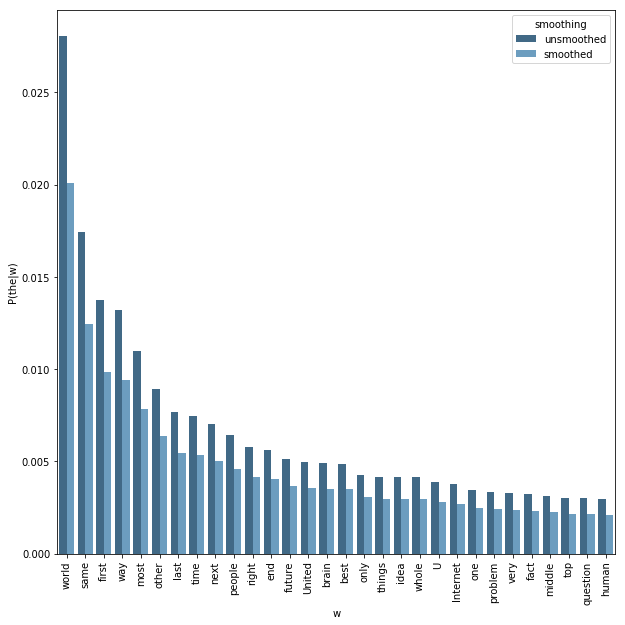

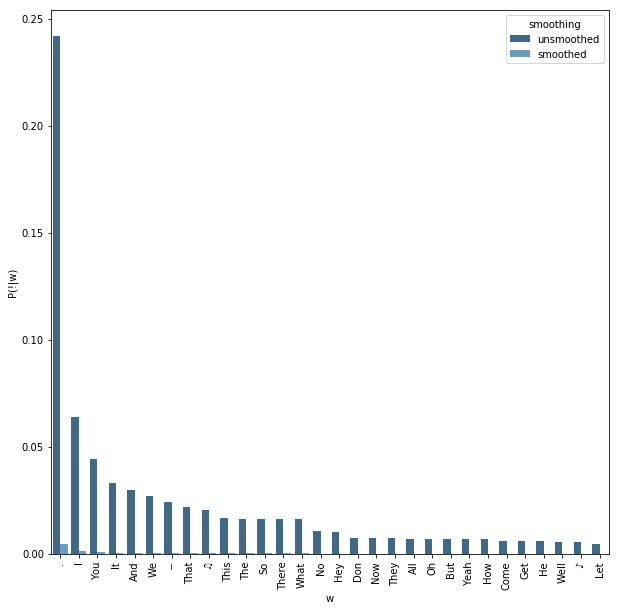

In [29]:
plot_bigram_dist(('the',), bigram = ngrams_dict[2][0], smoothbigram = ngrams_dict[2][1])
plot_bigram_dist(('!',), bigram = ngrams_dict[2][0], smoothbigram = ngrams_dict[2][1])

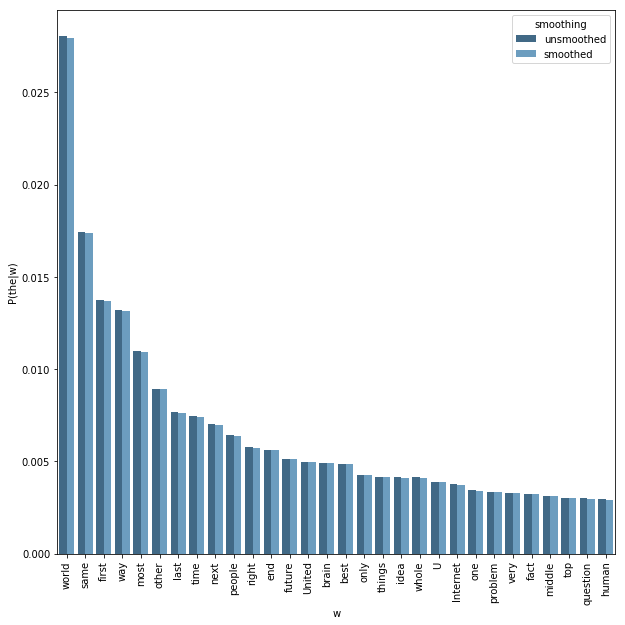

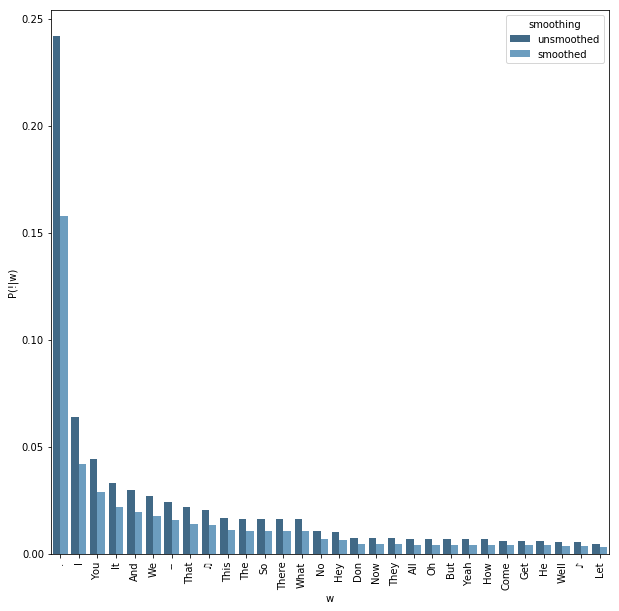

In [30]:
k = 0.01
if k not in ngrams_dict[2]:
    ngrams_dict[2][k], ngrams_dict[1][k] = train_ngram(data, N=2, V=len(w2i)+2, k=k)

plot_bigram_dist(('the',), bigram = ngrams_dict[2][0], smoothbigram = ngrams_dict[2][k])
plot_bigram_dist(('!',), bigram = ngrams_dict[2][0], smoothbigram = ngrams_dict[2][k])

ANSWER:

For frequent words such as 'the', we can see that the smoothed probabilities are lower as expected. The gaps in the probabilities are redistributed to unseen words.

For not that frequent words such as '!', we can see that the smoothed probabilities are relatively much lower. This is because since the probabilities of the observed words are already low, the probability mass is distributed almost equally between all the words of the vocabulary.


when k is very small however, we notice a different behavior. For frequent words such as 'the', the smoothed probabilities remain almost the same. For infrequent words such as '!', we still notice a decrease in the probability of the observed words, although the difference is not as significant as with k=1

when $c(w_{n-1})$ is high, we have that the term k is almost irrelevant and the probability is close to $\frac{ c(w_{n-1}w_n) }{c(w_{n-1}) + kV}$

when $c(w_{n-1})$ is small we have that the probability is close to $\frac{1}{V}$


**Recall** that if we have a sentence $w_1,\dots,w_n$ we can write

$$P(w_1\dots w_n) = P(w_1)P(w_2|w_1) \cdots P(w_i|w_1 \dots w_{n-1}) \approx P(w_1)P(w_2|w_1)\cdots P(w_{N-1}|w_1\dots w_{N-2})\prod_{i=N}^{n} P(w_i|w_{i-(N-1)}\dots w_{i-1})$$

where in the last step we make an $N$-gram approximation of the full conditionals.

For example, in the case of a bigram (N=2), the above expression reduces to

$$P(w_1 \dots w_n)\approx P(w_1)\prod_{i=2}^{n} P(w_i| w_{i-1}).$$

## Exercise 2.4 (5 points)

The following sentences are taken from the **training data**. Use your **unsmoothed unigram**, **bigram**, and **trigram** language model to estimate their **probabilities**:

    1. Every day was about creating something new .
    2. In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought 
       together in a collision , producing a burst of pure energy .

**Repeat** this with the **smoothed (add-1)** versions of the N-grams. What is the effect of smoothing on the probabilities?


In [31]:
def sent_prob(sent, k, N, lm):
    sent_ngram_prob = 1.0
    unigram = {}
    
    for n in range(2, N+1):
        # check if we have an n gram with k smoothing, and also an unigram with k smoothing
        if n in ngrams_dict and k in lm[n] and k in lm[1]:
            ngram, unigram = lm[n][k], lm[1][k]
        else: # if not, we have to train the ngram (together with the unigram)
            ngram, unigram = train_ngram(data, N=n, V=len(w2i)+2, k=k)
            lm[n][k], lm[1][k] = ngram, unigram
        
        if n < N:
            # we use lambda to make function more general
            # when history hasn't been seen, we just return 0.0
            # while when it has been seen, we search for a probability of a specific word
            val = (lambda: ngram[tuple(sent[:n-1])][sent[n-1]] 
                                if ngram[tuple(sent[:n-1])] != 0.0 
                                else ngram[tuple(sent[:n-1])])()
            sent_ngram_prob *= val
        else:
            # generate the ngrams of the sentence
            sent_ngrams = [sent[i:i+n] for i in range(len(sent) - n + 1)]
            
            sent_ngram_prob *= np.product([ngram[tuple(ngram_val[:-1])][ngram_val[-1]] # probability of the word in this history
                                            if ngram[tuple(ngram_val[:-1])] != 0.0 # this is for histories that have not appeared
                                            else ngram[tuple(ngram_val[:-1])] # if history did not appear, then return the default value for the history, which is zero
                                            for ngram_val in sent_ngrams]) # for every ngram, we have ngram_val[:-1] is the history, ngram_val[-1] is the current word
            
    # finally, compute the probabilities for the unigram
    sent_unigram_prob = np.product([unigram[word] for word in sent])
    
    return sent_ngram_prob, sent_unigram_prob

In [32]:
sent1 = '<s> Every day was about creating something new . </s>'.split()
sent2 = '<s> In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought \
together in a collision , producing a burst of pure energy . </s>'.split()

for i, sent in enumerate([sent1, sent2]):
    print("Probability of sentence {0}:\n ".format(i+1))
    for k in range(2):
        print("\tUsing {0} smoothing:\n".format(k))        

        for N in range(3, 1, -1):
            sent_ngram_prob, sent_unigram_prob = sent_prob(sent, k, N, ngrams_dict)
            print("\t\t{0}-gram: {2}\n".format(N, k, sent_ngram_prob))

        print("\t\tunigram: {1}\n".format(k, sent_unigram_prob))


Probability of sentence 1:
 
	Using 0 smoothing:

		3-gram: 1.2410921667414378e-11

		2-gram: 4.667998867880972e-17

		unigram: 8.711492631550748e-27

	Using 1 smoothing:

		3-gram: 1.5368267602896025e-35

		2-gram: 1.3642489842696694e-26

		unigram: 7.628943757061614e-27

Probability of sentence 2:
 
	Using 0 smoothing:

		3-gram: 3.5704327475022527e-31

		2-gram: 2.0159953795734388e-72

		unigram: 2.7545011290780525e-102

	Using 1 smoothing:

		3-gram: 1.4019256514798234e-136

		2-gram: 1.555307447842366e-116

		unigram: 4.109546393965371e-102



ANSWER:

The smoothing does not affect much the probabilities calculated using the unigrams, but clearly decreases the probability of having the analyzed sentence by several orders of magnitude for bigrams and even more for trigrams

## Exercise 2.5 (5 points)

The above sentences were taken from the training set, hence they will all have probability greater than 0. The big challenge for our language model are of course with sentence that contain unseen N-grams: if such an N-gram occurs our model immediately assigns the sentence probability zero.

The following three senteces are taken from the **test set** availlable in the file **ted-test.txt**. What probabilities do your smoothed and unsmoothed language models asign in this case?

    1. Because these robots are really safe .
    2. We have sheer nothingness on one side , and we have this vision of a reality that encompasses every 
       conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible 
       reality .

In [33]:
sent1 = '<s> Because these robots are really safe . </s>'.split()
sent2 = '<s> We have sheer nothingness on one side , and we have this vision of a reality that encompasses every \
conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible \
reality . </s>'.split()

for i, sent in enumerate([sent1, sent2]):
    print("Probability of sentence {0}:\n ".format(i+1))
    for k in range(2):
        print("\tUsing {0} smoothing:\n".format(k))
        
        for N in range(3, 1, -1):
            sent_ngram_prob, sent_unigram_prob = sent_prob(sent, k, N, ngrams_dict)
            print("\t\t{0}-gram: {2}\n".format(N, k, sent_ngram_prob))
        
        print("\t\tunigram: {1}\n".format(k, sent_unigram_prob))

Probability of sentence 1:
 
	Using 0 smoothing:

		3-gram: 0.0

		2-gram: 2.6913665324688018e-15

		unigram: 3.5731707008639346e-24

	Using 1 smoothing:

		3-gram: 2.4686213252546237e-33

		2-gram: 7.259172702960281e-24

		unigram: 3.1752807875634993e-24

Probability of sentence 2:
 
	Using 0 smoothing:

		3-gram: 0.0

		2-gram: 0.0

		unigram: 3.699664748429897e-120

	Using 1 smoothing:

		3-gram: 0.0

		2-gram: 1.050158700443956e-126

		unigram: 3.60960523835821e-120



### [Optional]

**Optional** What percentage of the sentences in the test set get assigned probability 0 under your smoothed and unsmoothed language models? 

In [34]:
test_file = os.path.join(data_dir, "ted/ted-test.txt")
data_test, w2i_test, i2w_test = read(test_file)

N = 2
c0 = 0
c1 = 0

for sent in data_test:
        sent_ngram_prob, sent_unigram_prob = sent_prob(sent, 0, N, ngrams_dict)
        if sent_ngram_prob == 0.0:
            c0 += 1
        sent_ngram_prob, sent_unigram_prob = sent_prob(sent, 1, N, ngrams_dict)
        if sent_ngram_prob == 0.0:
            c1 += 1
print('Percentage of the sentences with 0 probability using bigrams:\n')
print('\t without smoothing:{0}%\n'.format(np.round((c0*100/ len(data_test)), 3)))
print('\t with smoothing: {0}%\n'.format(np.round((c1*100/len(data_test)), 3)))

Percentage of the sentences with 0 probability using bigrams:

	 without smoothing:71.329%

	 with smoothing: 11.189%



## Exercise 2.6 (5 points)

**Perplexity** is very frequently used **metric** for evaluating probabilistic models such as language models. The perplexity (sometimes called **PP** for short) of a language model on a sentence is the **inverse probability** of the sentence, **normalized** by the number of words:

$$PP(w_1 \dots w_n) = P(w_1\dots w_n)^{-\frac{1}{n}}.$$

Here we can again approximate $P(w_1 \dots w_n)$ with N-gram probabilities, as above.
Note: $(x_1\cdots x_n)^{-\frac{1}{n}}$ is the **geometric mean** of the numbers $x_1,\dots,x_n$. It is like the (regular) artithmetic mean, but with **products** instead of **sums**. The geometric mean is a more natural choice in the case of *PP* because behind $P(w_1\dots w_n)$ is a series of $n$ products ([more here](https://en.wikipedia.org/wiki/Geometric_mean)).



Compute the perplexity of the training sentences from excercise 2.1. What big difference between the **probabilities** of the sentences and the **perplexities** of the sentences do you notice?

In [35]:
sent1 = '<s> Every day was about creating something new . </s>'.split()
sent2 = '<s> In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought \
together in a collision , producing a burst of pure energy . </s>'.split()

for i, sent in enumerate([sent1, sent2]):
    print("Perplexity of sentence {0}: \n".format(i+1))
    for k in range(2):
        print("\tUsing {0} smoothing:\n".format(k))
        
        for N in range(3, 1, -1):
            sent_ngram_prob, sent_unigram_prob = sent_prob(sent, k, N, ngrams_dict)
            sent_ngram_pp = np.power(sent_ngram_prob, -1/len(sent))
            print("\t\t{0}-gram: {2}\n".format(N, k, sent_ngram_pp))
        
        sent_unigram_pp = np.power(sent_unigram_prob, -1/len(sent))
        print("\t\tunigram: {1}\n".format(k, sent_unigram_pp))


Perplexity of sentence 1: 

	Using 0 smoothing:

		3-gram: 12.32025215638067

		2-gram: 42.9622408820975

		unigram: 403.63678900916966

	Using 1 smoothing:

		3-gram: 3029.2666846582733

		2-gram: 385.9318631434462

		unigram: 409.0284897884788

Perplexity of sentence 2: 

	Using 0 smoothing:

		3-gram: 7.8615505281093725

		2-gram: 128.43739376623046

		unigram: 970.6386043998526

	Using 1 smoothing:

		3-gram: 9901.125362639064

		2-gram: 2547.5519644554456

		unigram: 959.2840832965023



ANSWER:

The main difference between probabilities and perplexities is that the higher are the probabilities, the lower is perplexity and vice versa, so our goal is to minimize perplexity, thus maximizing the probability.

We notice that the smoothing has a very strong impact also on the perplexities. Again, this impact is little for unigram and increases for bigrams and even more for trigrams.

# That's it!

Congratulations, you have made it to the end of the tutorial. Here we will recap the gist of this notebook. 

**Make sure all your cells can be executed and all your answers are there. Then, read on if you're interested!**

-----

By now you should have a solid feeling for the problem of **sparsity in language data**; there's just never enough data. For the task of language modelling, we saw that sparsity is a serious challenge. 

It would be great to be able to model $p(w_n|w_1 \dots w_{n-1})$ for unlimited $n$: the larger $n$ the better our language model should become at capturing the long-range dependencies between words that characterize actual human sentences, and the more probability our model will asign to such sentences as opposed to sentences that are word-soup. But in the N-gram approach, increasing $n$ will quickly kill all generalizing abilities of the model: the model will start to asign probabilities only to sentences it has seen in the training data.

So, where to go from here? Here are three directions that we could head in.

### Smoothing

We have seen one example of smoothing in this lab: add-k smoothing. This is an easy method, both conceptually and implementation-wise. But the results are not great, and the effects it has on the distributions can be extreme.

A much more sophisticated method of smoothing is so-called **Kneser-Ney smoothing**. The method is described in detail in section 4.5 of J&M (3rd edition). This is one of the best performing N-gram smoothing methods, and up to a few years ago a popular implementation of it called [KenLM](https://kheafield.com/code/kenlm/) gave state of the art results.

### From words to characters

In this lab we have considered language modeling as the task of predicting a **word** $w_n$ based on a history of **words** $w_1\cdots w_n$. What if instead we let our basic units of modelling be **characters**? The task then becomes to model $p(c_k\mid c_{k-N-1}\dots c_{k-1})$ where each $c_i$ is now an ASCII character instead of an entire word.

Suddenly sparsity of data is no longer a problem! The set of characters to use is tiny (< 100) compared to even a small-sized vocabulary as today. Have a look at this very illustrative notebook written by Yoav Golberg to see such a method in action: [The unreasonable effectiveness of Character-level Language Models](http://nbviewer.jupyter.org/gist/yoavg/d76121df_trainde2618422139).

(So what is the downside?)


### Neural language models

The above notebook was actually written as a response to this blog post by Andrej Karpathy: [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Go ahead and read it if you haven't already: it is a superb introduction to the topic of Recurrent Neural Networks.

Neural language models solve the problem of data sparsity in a different manner. Instead of estimating the probabilities $p(w_k\mid w_{k-N-1}\dots w_{k-1})$ by counting occurences in the data, they use a neural network $f_{\theta}$ parametrized by parameters $\theta$ to predict this probability. The parameters $\theta$ are learned through optimization. 

The simplest approach goes like this: each word in the history $w_{k-N-1}\dots w_{k-1}$ is embedded separately giving  vectors $e_{k-N-1}\dots e_{k-1}$ and then concatenated into one long vectors $[e_{k-N-1};\dots ;e_{k-1}]$. The network then uses this history vector to predict a probability distribution over words $w$ in the vocabulary $V$:

$$p(w \mid w_{k-N-1}\dots w_{k-1}) = f_{\theta}([e_{k-N-1};\dots;e_{k-1}]).$$

(In order to produce legitimate probabilities the final layer of such a network will be for example a $softmax$.)

This provides a solution to the sparsity problem by having the network let the individual embeddings of the words in the history interact through its non-linear transforamtion. We are letting the network figure out the smoothing itself!

RNNs are a clever extension of this idea, where a hidden state vector $h$ is re-used and updated at each step $k$ in order to store the information of the entire history up to step $k-1$. That is, an RNN actually does away with the N-order approximation; it tries to model the full conditional directly! That means that

$$p(w \mid w_1\dots w_{k-1}) \approx RNN_{\theta}([e_{k-1};h_{k-1}])$$

where the hidden state $h_{k-1}$ is a compression of the *entire history* $w_1\dots w_{k-1}$.

Another great place to learn about RNNs, their problems, and solutions to those, is on the blog of [Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/). The project on language modelling will involve learning more about these methods. 

-----------
(And now, it's time to read the classic essay by Eugene Wigner that gave both of the posts their title: [The Unreasonable Effectiveness of Mathematics in the Natural Sciences](http://www.dartmouth.edu/~matc/MathDrama/reading/Wigner.html))

In [36]:
# as explained at the beginning of the second exercise, here we use a different approach. 
# we call our functions with the word augmented to indicate this. 
# whenever we see a <s> start of sentence symbol, we replace it with N-1 of it. This is because we want to correctly
# train our N-gram model for the start of the sentence

# clear the memory from previously used variables
%reset -f
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from collections import Counter, defaultdict

data_dir = './'

In [37]:
train_file = os.path.join(data_dir, "ted/ted-train.txt")

def read(fname, max_lines=np.inf):
    """
    Reads in the data in fname and returns it as
    one long list of words. Also returns a vocabulary in
    the form of a word2index and index2word dictionary.
    """
    data = []
    # w2i will automatically keep a counter to asign to new words
    w2i = defaultdict(lambda: len(w2i))
    i2w = dict()
    start = "<s>"
    end = "</s>"
    
    with open(fname, "r") as fh:
        for k, line in enumerate(fh):
            if k > max_lines:
                break
            words = line.strip().split()
            # assign an index to each word
            for w in words:
                i2w[w2i[w]] = w # trick
            
            sent = [start] + words + [end]
            data.append(sent)

    return data, w2i, i2w

In [38]:
ngrams_dict_augmented = defaultdict(dict)

def train_ngram_augmented(data, N, V, k=0):
    """
    Trains an n-gram language model with optional add-k smoothing
    and additionaly returns the unigram model
    
    :param data: text-data as returned by read
    :param N: (N>1) the order of the ngram e.g. N=2 gives a bigram
    :param k: optional add-k smoothing
    :returns: ngram and unigram
    """
    ngram = defaultdict(Counter) # ngram[history][word] = #(history,word)
    unpacked_data = [word for sent in data for word in sent]
    unigram = defaultdict(np.float64, Counter(unpacked_data)) # default prob is 0.0
    for key in unigram.keys():
        unigram[key] = np.float64(unigram[key] + k)/np.float64(len(unpacked_data) + k * V)
    
    ngram_unpacked_data = [item for sublist in ([word] if word != '<s>' else [word]*(N-1) # replicate N-1 times the start of sentence symbol so that we can appropriately use N-grams later
                                                for word in unpacked_data)
                           for item in sublist]
    
    # use a generator to decrease memory usage
    def hist():
        i = 0
        while i < len(ngram_unpacked_data) - N + 1:
            current_history = ngram_unpacked_data[i:i+N]
            i += 1
            if current_history[-1] == '</s>':
                # here we skip N-1 words, which correspond to the N-1 <s> tokens added before. We do not need ngrams that end with <s>
                i += N - 1
            yield current_history
        
    for element in hist():
        n_word_comb = tuple(element[:-1]) # history
        word = element[-1]
        ngram[n_word_comb][word] += 1
        
    for history in ngram:
        count_history = sum(ngram[history].values())
        for word in ngram[history]:
            ngram[history][word] = np.float64(ngram[history][word] + k)/np.float64(count_history + k * V)
        ngram[history] = defaultdict(
            lambda k=k, V=V, count_history=count_history: np.float64(k)/np.float64(count_history + k * V),
            ngram[history]
        )

    ngram = defaultdict(np.float64, ngram)
    
    return ngram, unigram

data, w2i, i2w = read(train_file)

# train different N-grams
for N in range(2, 5):
    if N not in ngrams_dict_augmented:
        ngrams_dict_augmented[N][0], ngrams_dict_augmented[1][0] = train_ngram_augmented(data, N=N, V=len(w2i)+2, k=0)
        ngrams_dict_augmented[N][1], ngrams_dict_augmented[1][1] = train_ngram_augmented(data, N=N, V=len(w2i)+2, k=1)

In [39]:
from random import random

def sample_from_dict(d):
    u = random() * sum(d.values()) # uniformly random number between 0 and 1
    p = 0
    for k in d:
        p += d[k]
        if p >= u: 
            return k # the first i s.t. p1 + ... + pi > u
        
def generate_sent_augmented(lm, N):
    text = []
    limit = 100001
    k = 1
    # start with N-1 start of sentence token because we want to generate words using an N-gram without using lower n-grams
    sentence = ['<s>']*(N-1)
    next_word = ' '
    
    # check for retraining
    if N in lm and k in lm[N]:
        ngram = lm[N][k]
    else:
        ngram, unigram = train_ngram(data, N=N, V=len(w2i)+2, k=1)
        lm[N][k], lm[1][k] = ngram, unigram 
    # generate words until end of sentence token or limit of words reached
    while next_word != '</s>' and len(sentence) < limit:
        key = sentence[-N+1:]
        d_gen = ngram[tuple(key)]
        next_word = sample_from_dict(d_gen) # use the custom sampling function for dictionaries
        sentence.append(next_word)
    if sentence[-1] != '</s>': 
        sentence.append('</s>') # correctly append end of sentence token in case of limit reached
    return sentence[N-1:-1] # ignore the start and end token here to return pure sentence

sentence = ' '.join(generate_sent_augmented(ngrams_dict_augmented, 2))
print(sentence)

These are naturally , 63 languages , and explain all , if I 've got to come to choose samples that possible .


In [40]:
import pandas as pd
import seaborn as sns    

def plot_bigram_dist(word, bigram, smoothbigram, k=30):
    d = bigram[word]
    ds = smoothbigram[word]
    
    # sort the probabilities
    d_sort = sorted(d.items(), reverse=True, key=lambda t: t[1])[0:k]
    ds_sort = sorted(ds.items(), reverse=True, key=lambda t: t[1])[0:k]
    
    _, probs = zip(*d_sort)
    smooth_ws, smooth_probs = zip(*ds_sort)
    
    # make up for the fact that in the unsmoothed case  probs is generally less than k long
    probs = probs + (0,) * (k-len(probs)) 

    w_data = pd.DataFrame({"w": smooth_ws * 2,
                           "P({}|w)".format(word[0]): probs + smooth_probs,
                           "smoothing": ["unsmoothed"]*k + ["smoothed"]*k})
    
    fig, ax = plt.subplots(figsize=(10,10))
    plt.xticks(rotation=90)
    g = sns.barplot(ax=ax, x="w", y="P({}|w)".format(word[0]), hue="smoothing",
                    data=w_data, palette="Blues_d")    

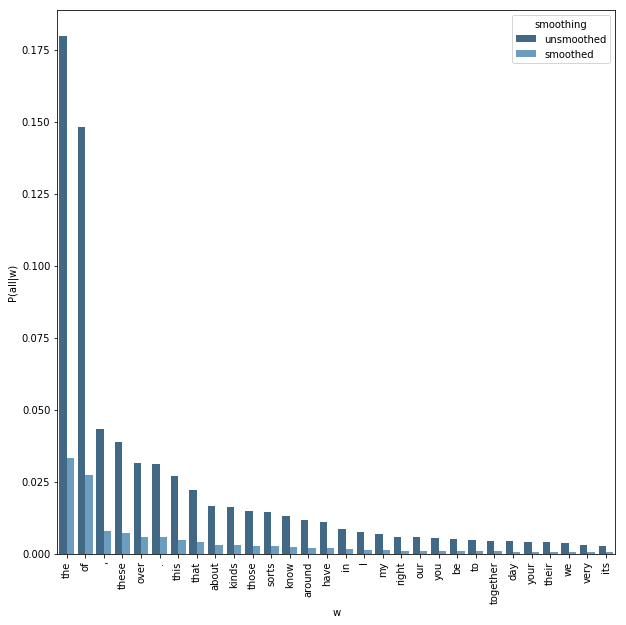

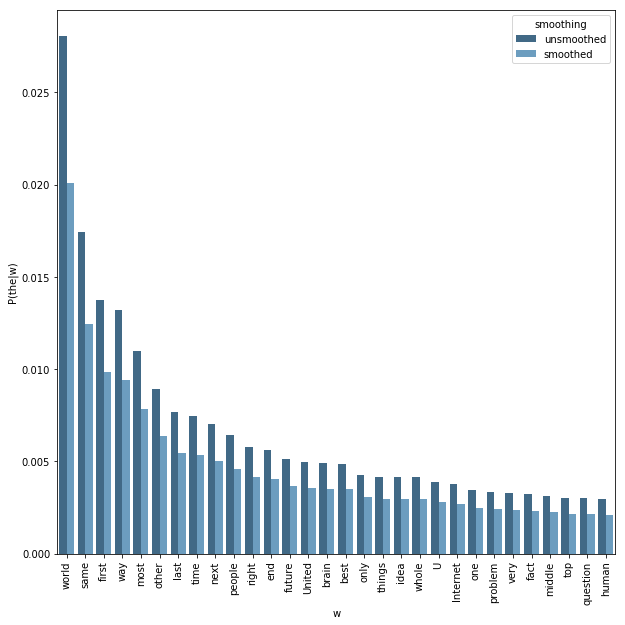

In [41]:
plot_bigram_dist(('all',), bigram = ngrams_dict_augmented[2][0], smoothbigram = ngrams_dict_augmented[2][1])
plot_bigram_dist(('the',), bigram = ngrams_dict_augmented[2][0], smoothbigram = ngrams_dict_augmented[2][1])

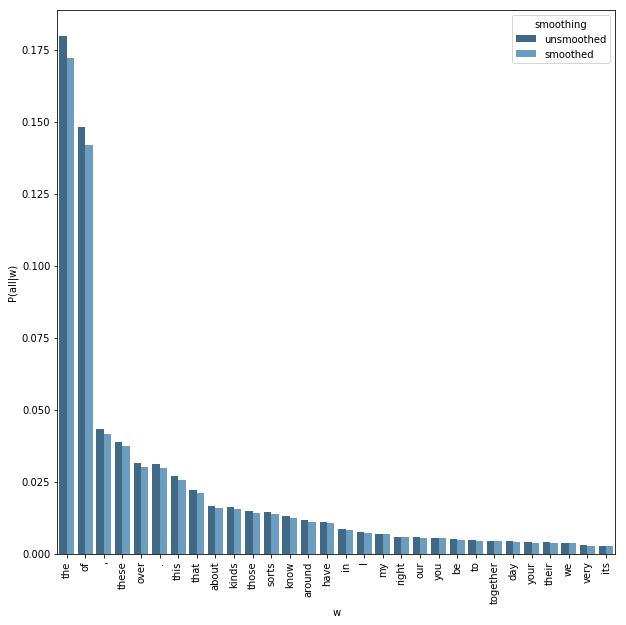

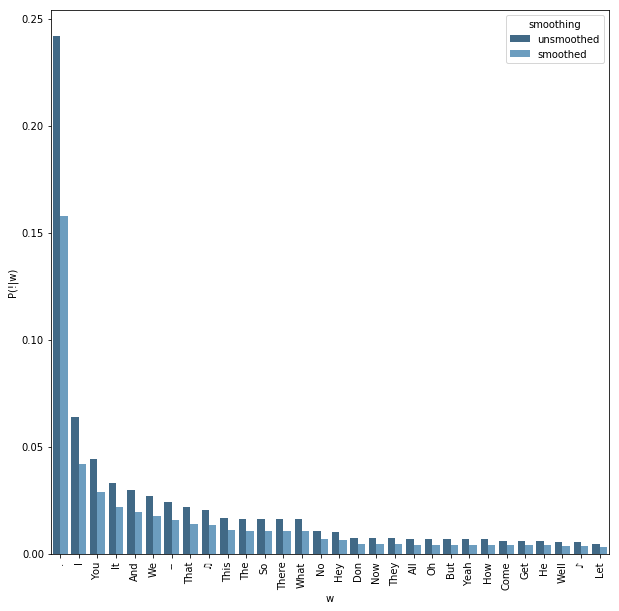

In [42]:
k = 0.01
if k not in ngrams_dict_augmented[2]:
    ngrams_dict_augmented[2][k], ngrams_dict_augmented[1][k] = train_ngram_augmented(data, N=2, V=len(w2i)+2, k=k)

plot_bigram_dist(('all',), bigram = ngrams_dict_augmented[2][0], smoothbigram = ngrams_dict_augmented[2][k])
plot_bigram_dist(('!',), bigram = ngrams_dict_augmented[2][0], smoothbigram = ngrams_dict_augmented[2][k])

In [43]:
def sent_prob_augmented(sent, k, N, lm):
    unigram = {}
    
    if N in lm and k in lm[N] and k in lm[1]: # check if we have an n gram with k smoothing, and also an unigram with k smoothing
        ngram, unigram = lm[N][k], lm[1][k]
    else:# if not, we have to train the ngram (together with the unigram)
        ngram, unigram = train_ngram_augmented(data, N=N, V=len(w2i)+2, k=k)
        lm[N][k], lm[1][k] = ngram, unigram
    
    # we replicate the <s> symbol so that we can calculate the probabilities appropriately
    ngram_unpacked_data = [item for sublist in [[word] if word != '<s>' else [word]*(N-1) # when we see the start of sentence token, we replicate it N-1 times 
                                                for word in sent] 
                           for item in sublist]
    
    # generate the ngrams of the sentence
    sent_ngrams = [ngram_unpacked_data[i:i+N] for i in range(0, len(ngram_unpacked_data) - N + 1)]
    
    sent_ngram_prob = np.product([ngram[tuple(ngram_val[:-1])][ngram_val[-1]]# probability of the word in this history
                                    if ngram[tuple(ngram_val[:-1])] != 0.0 # this is for histories that have not appeared
                                    else ngram[tuple(ngram_val[:-1])] # if history did not appear, then return the default value for the history, which is zero
                                    for ngram_val in sent_ngrams]) # for every ngram, we have ngram_val[:-1] is the history, ngram_val[-1] is the current word

    # finally, compute the probabilities for the unigram
    sent_unigram_prob = np.product([unigram[word] for word in sent])
    
    return sent_ngram_prob, sent_unigram_prob


In [44]:
sent1 = '<s> Every day was about creating something new . </s>'.split()
sent2 = '<s> In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought \
together in a collision , producing a burst of pure energy . </s>'.split()

for i, sent in enumerate([sent1, sent2]):
    print("Probability of sentence {0}:\n ".format(i+1))
    for k in range(2):
        print("\tUsing {0} smoothing:\n".format(k))
        
        for N in range(3, 1, -1):
            sent_ngram_prob, sent_unigram_prob = sent_prob_augmented(sent, k, N, ngrams_dict_augmented)
            print("\t\t{0}-gram: {2}\n".format(N, k, sent_ngram_prob))
        
        print("\t\tunigram: {1}\n".format(k, sent_unigram_prob))

Probability of sentence 1:
 
	Using 0 smoothing:

		3-gram: 1.241092166741438e-11

		2-gram: 4.667998867880972e-17

		unigram: 8.711492631550748e-27

	Using 1 smoothing:

		3-gram: 1.5368267602896025e-35

		2-gram: 1.3642489842696694e-26

		unigram: 7.628943757061614e-27

Probability of sentence 2:
 
	Using 0 smoothing:

		3-gram: 3.570432747502253e-31

		2-gram: 2.0159953795734388e-72

		unigram: 2.7545011290780525e-102

	Using 1 smoothing:

		3-gram: 1.401925651479823e-136

		2-gram: 1.555307447842366e-116

		unigram: 4.109546393965371e-102



In [45]:
sent1 = '<s> Because these robots are really safe . </s>'.split()
sent2 = '<s> We have sheer nothingness on one side , and we have this vision of a reality that encompasses every \
conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible \
reality . </s>'.split()

for i, sent in enumerate([sent1, sent2]):
    print("Probability of sentence {0}:\n ".format(i+1))
    for k in range(2):
        print("\tUsing {0} smoothing:\n".format(k))
        
        for N in range(3, 1, -1):
            sent_ngram_prob, sent_unigram_prob = sent_prob_augmented(sent, k, N, ngrams_dict_augmented)
            print("\t\t{0}-gram: {2}\n".format(N, k, sent_ngram_prob))
        
        print("\t\tunigram: {1}\n".format(k, sent_unigram_prob))

Probability of sentence 1:
 
	Using 0 smoothing:

		3-gram: 0.0

		2-gram: 2.6913665324688018e-15

		unigram: 3.5731707008639346e-24

	Using 1 smoothing:

		3-gram: 2.4686213252546237e-33

		2-gram: 7.259172702960281e-24

		unigram: 3.1752807875634993e-24

Probability of sentence 2:
 
	Using 0 smoothing:

		3-gram: 0.0

		2-gram: 0.0

		unigram: 3.699664748429897e-120

	Using 1 smoothing:

		3-gram: 0.0

		2-gram: 1.050158700443956e-126

		unigram: 3.60960523835821e-120



In [46]:
sent1 = '<s> Every day was about creating something new . </s>'.split()
sent2 = '<s> In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought \
together in a collision , producing a burst of pure energy . </s>'.split()

for i, sent in enumerate([sent1, sent2]):
    print("Perplexity of sentence {0}: \n".format(i+1))
    for k in range(2):
        print("\tUsing {0} smoothing:\n".format(k))
        
        for N in range(3, 1, -1):
            sent_ngram_prob, sent_unigram_prob = sent_prob_augmented(sent, k, N, ngrams_dict_augmented)
            sent_ngram_pp = np.power(sent_ngram_prob, -1/len(sent))
            print("\t\t{0}-gram: {2}\n".format(N, k, sent_ngram_pp))
        
        sent_unigram_pp = np.power(sent_unigram_prob, -1/len(sent))
        print("\t\tunigram: {1}\n".format(k, sent_unigram_pp))


Perplexity of sentence 1: 

	Using 0 smoothing:

		3-gram: 12.32025215638067

		2-gram: 42.9622408820975

		unigram: 403.63678900916966

	Using 1 smoothing:

		3-gram: 3029.2666846582733

		2-gram: 385.9318631434462

		unigram: 409.0284897884788

Perplexity of sentence 2: 

	Using 0 smoothing:

		3-gram: 7.861550528109372

		2-gram: 128.43739376623046

		unigram: 970.6386043998526

	Using 1 smoothing:

		3-gram: 9901.125362639066

		2-gram: 2547.5519644554456

		unigram: 959.2840832965023



In [47]:
%reset -f